In [19]:
# target parameters of f(x) = a + b*x + c*x*x + d*x*x*x
a = 4
b = -3
c = -2
d = 3

In [20]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000) #500 punti di traning
x_valid = np.random.uniform(-1, 1, 1000) #50 punti di validazione
x_valid.sort()
y_target = a + b*x_valid + c*x_valid*x_valid + d*x_valid*x_valid*x_valid # ideal (target) third grade polynomial

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b*x_train + c*x_train*x_train + d*x_train*x_train*x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*x_valid*x_valid + d*x_valid*x_valid*x_valid, sigma)

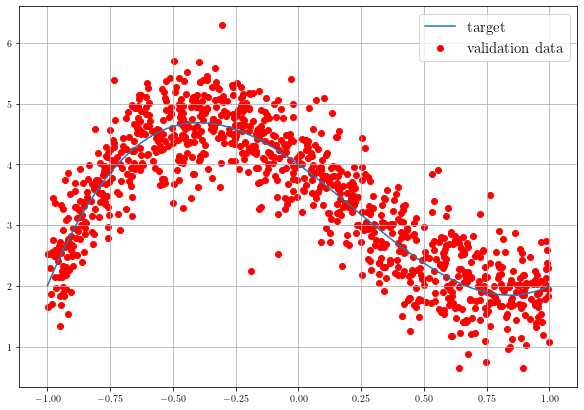

In [21]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='arial')

plt.figure(figsize=(10,7))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [22]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(8, input_shape=(1,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [23]:
# get a summary of our composed model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 63        
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 232
Trainable params: 232
Non-trainable params: 0
________________________________________________________

In [24]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/80
313/313 [==============================] - 1s 2ms/step - loss: 0.9057 - mse: 0.9057 - val_loss: 0.3919 - val_mse: 0.3919
Epoch 2/80
313/313 [==============================] - 0s 1ms/step - loss: 0.3096 - mse: 0.3096 - val_loss: 0.2785 - val_mse: 0.2785
Epoch 3/80
313/313 [==============================] - 0s 1ms/step - loss: 0.2645 - mse: 0.2645 - val_loss: 0.2569 - val_mse: 0.2569
Epoch 4/80
313/313 [==============================] - 0s 2ms/step - loss: 0.2568 - mse: 0.2568 - val_loss: 0.2536 - val_mse: 0.2536
Epoch 5/80
313/313 [==============================] - 0s 1ms/step - loss: 0.2568 - mse: 0.2568 - val_loss: 0.2638 - val_mse: 0.2638
Epoch 6/80
313/313 [==============================] - 0s 1ms/step - loss: 0.2564 - mse: 0.2564 - val_loss: 0.2652 - val_mse: 0.2652
Epoch 7/80
313/313 [==============================] - 0s 1ms/step - loss: 0.2535 - mse: 0.2535 - val_loss: 0.2547 - val_mse: 0.2547
Epoch 8/80
313/313 [==============================] - 0s 2ms/step - loss: 0.

In [9]:
# return weights and biases
model.get_weights()

[array([[-4.8876468e-02,  2.2171630e-01,  2.6515275e-01, -6.5442435e-03,
          4.1952831e-01,  3.2247239e-01,  2.9632023e-01, -9.1058320e-01,
         -6.7749554e-01,  1.3747388e-01,  4.0206021e-01,  4.0029997e-01,
          2.9848432e-04, -9.3960178e-01, -5.9202224e-01,  2.0403296e-01,
          3.7217608e-01, -1.3665223e-02, -1.6176499e-01,  4.6947038e-01,
          6.0661632e-01, -1.1289169e+00,  2.3884189e-01, -7.6024763e-02,
          3.2014132e-01, -8.2465094e-01,  1.5410522e-01,  1.9204067e-02,
          3.7470087e-01,  1.3741648e-01, -3.0545187e-01,  2.4202894e-01,
          7.7903718e-02, -6.3753015e-01,  4.0412095e-01,  3.1713331e-01,
          4.4430882e-02,  1.4764504e-01,  2.4164625e-01,  1.0754565e-01,
          1.4562528e-01,  1.5299094e-01,  1.6419797e-01, -8.8945067e-01,
          3.4208643e-01, -2.8024837e-01,  2.5848418e-01, -5.0642133e-01,
          4.4001660e-01,  5.7719219e-01,  3.1150854e-01, -4.8311263e-02,
         -3.4327742e-02,  9.7828381e-02,  4.2264257

In [25]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.2520 - mse: 0.2520

Test loss: 0.2520349323749542
Test accuracy: 0.2520349323749542


In [11]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038

Test loss: 0.003782696556299925
Test accuracy: 0.003782696556299925


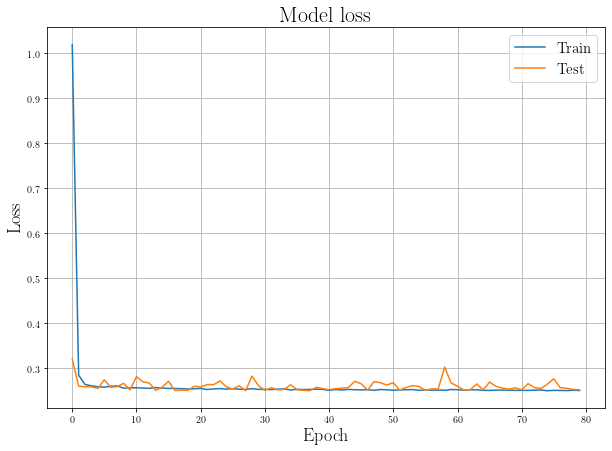

In [93]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=22)
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.legend(['Train', 'Test'], loc='best', fontsize=15)
plt.grid(True)
plt.show()

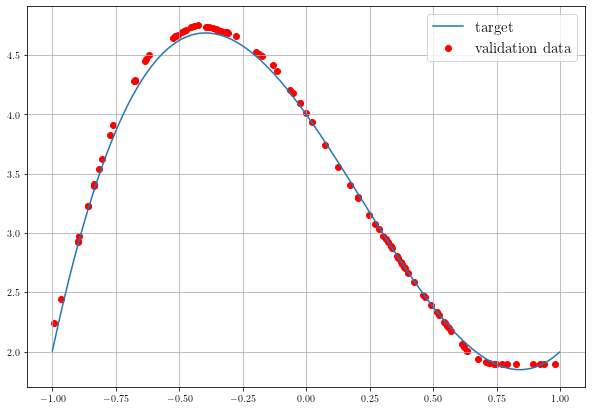

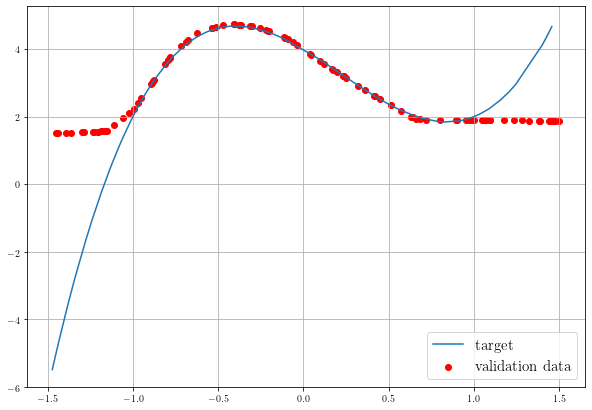

In [94]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted, color='r', label='validation data')
plt.plot(x_valid, y_target, label='target')
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
x_test = np.random.uniform(-1.5, 1.5, 100) #50 punti di validazione

x_test.sort()
y_test = a + b*x_test + c*x_test*x_test + d*x_test*x_test*x_test # ideal (target) third grade polynomial

plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted, color='r', label='validation data')
plt.plot(x_test, y_test, label='target')
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [75]:
save_model_path='Saved/fit_polynomial_6'
model.save(filepath=save_model_path, include_optimizer=True)

INFO:tensorflow:Assets written to: Saved/fit_polynomial_6/assets
